# Titanic (1/2): Exploration and Preprocessing

- This is a Kernel (my first one on Kaggle) to explore and pre-process (cleaning, visualizing and feature engineering) the Titanic Dataset
- The output will be used in my next Kernel to model, predict and score on the Test Dataset and submit my results.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Import Dataset

In [2]:
IN_CLOUD  = False
INPUT_DIR = '../input' if IN_CLOUD else './data'

In [3]:
train_df = pd.read_csv(f'{INPUT_DIR}/train.csv')

#### Print types of the columns and get an overview of the Dataset by print few random rows: 

In [4]:
# Overview of the Dataset

print(train_df.dtypes)
train_df.sample(8)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C


### Check for Missing Values in columns:

In [5]:
# Check Missing Values

print(f'Count of Missing Values for each Column (out of {len(train_df)}): ')
print(train_df.isnull().sum())


Count of Missing Values for each Column (out of 891): 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### We notice that having 891 rows, we have:
    - 687 missing values in the 'Cabin' column, which is about 77%
    - 177 missing values in the 'Age' column
    - 2 missing values in the 'Embarked' column


- We will drop the 'Cabin' column because it has too many missing values

In [6]:
train_df.drop('Cabin', axis=1, inplace=True)

- Since we only have 2 missing values in 'Embarked', we can fill them with the most occured value.

In [7]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:

train_df.Embarked.fillna('S', inplace=True)
assert not train_df.Embarked.isnull().any()


- We will deal with the Age column later, but for now let's fill the missing values with **the mean of all ages**.
  
  ( ***We will also save the rows that have missing age values to process them later again*** )

In [9]:
missing_age_rows = train_df[train_df['Age'].isnull()].copy() # Save for later processing
missing_age_rows.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C


In [10]:
train_df.Age.fillna(train_df['Age'].mean(), inplace=True)
assert not train_df.Age.isnull().any()

## Some quick Visualizations & Processings on Features

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
COLOR_SURVIVED='#57e8fc'
COLOR_DEAD='#fc5e57'

### Overall Survival Ratio
<span style="color:red; font-weight: bold">#Data Visualisation</span>

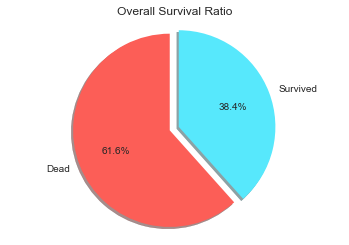

In [13]:
# Survival Ratio

labels = ['Dead', 'Survived']
val_counts = train_df.Survived.value_counts()
#print(vals)
sizes = [val_counts[0], val_counts[1]]
colors = [COLOR_DEAD, COLOR_SURVIVED ]
#print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.title('Overall Survival Ratio')
plt.show()


### The "Sex" Feature:
<span style="color:red; font-weight: bold">#Feature Encoding  #Data Visualisation</span>

#### We will convert the values in 'Sex' column to integers because it's more practical and fast

In [14]:
def encode_sex(sex_col):
    return sex_col.map({'female': 0, 'male': 1}).astype('int')

In [15]:
train_df.Sex = encode_sex(train_df.Sex)
print(train_df.Sex.dtype)
train_df.Sex.unique()

int64


array([1, 0])

In [16]:
COLOR_MALE   = '#6699ff'
COLOR_FEMALE = '#ff66ff'

1    577
0    314
Name: Sex, dtype: int64 ['Female', 'Male']


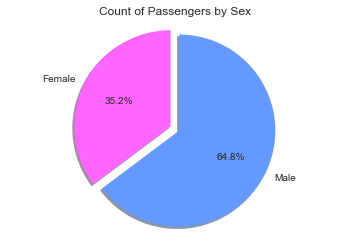

In [17]:
val_counts = train_df.Sex.value_counts()
sizes  = [val_counts[0], val_counts[1]]
labels = ['Female', 'Male']
colors = [COLOR_FEMALE, COLOR_MALE]

print(val_counts, labels)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1, 0), autopct='%1.1f%%', colors= colors)
ax.axis('equal')
plt.title('Count of Passengers by Sex')
plt.show()

Survived    0    1
Sex               
0          81  233
1         468  109


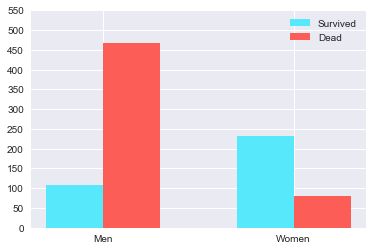

In [18]:
ct = pd.crosstab(train_df.Sex, train_df.Survived)

ind = np.arange(2)
survived_vals = [ct.loc[1][1], ct.loc[0][1]]
dead_vals = [ct.loc[1][0], ct.loc[0][0]]
print(ct)

width=0.3

plt.bar(ind, survived_vals, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, dead_vals, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, ('Men', 'Women'))
plt.yticks(np.arange(0, 600, 50))
plt.legend( loc='upper right')
plt.show()

#ax.bar(ct)

### The "Age Category" Feature:
<span style="color:red; font-weight: bold">#Feature Engineering #Data Visualisation</span>

#### We create a new Feature 'AgeCat' to assign each passenger an Age Category:
    - less than 14 years old => 0 (Kids)
    - 14 ~ 22 years old      => 1 (Teens)
    - 22 ~ 35 years old      => 2 (Adults)
    - 35 ~ 50 years old      => 3 (Bid Adults)
    - more than 50 years old => 4 (Seniors)

In [19]:
def construct_age_cat_col(age_col):
    age_cat_col = pd.Series([-1] * len(age_col))
    for i, val in age_col.iteritems():
        if val < 14:                 # Kids
            age_cat_col[i] = 0
        elif val >= 14 and val < 22: # Teens
            age_cat_col[i] = 1
        elif val >= 22 and val < 35: # Adults
            age_cat_col[i] = 2
        elif val >= 35 and val < 50: # Big Adults
            age_cat_col[i] = 3
        elif val >= 50:              # Seniors
            age_cat_col[i] = 4
        else:
            raise ValueError('Preprocessing Age: Age Value unsupported ! ', val)
    return age_cat_col

In [20]:
print('Information about the ages of the passengers:')
#print(train_df.Age.describe())

train_df['AgeCat'] = construct_age_cat_col(train_df.Age)

train_df.sample(5)

Information about the ages of the passengers:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCat
831,832,1,2,"Richards, Master. George Sibley",1,0.83,1,1,29106,18.7500,S,0
483,484,1,3,"Turkula, Mrs. (Hedwig)",0,63.00,0,0,4134,9.5875,S,4
325,326,1,1,"Young, Miss. Marie Grice",0,36.00,0,0,PC 17760,135.6333,C,3
315,316,1,3,"Nilsson, Miss. Helmina Josefina",0,26.00,0,0,347470,7.8542,S,2
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.00,0,0,13213,35.5000,C,4


#### Proportion of each Age Category

In [21]:
labels = ['Kids', 'Teens', 'Adults', 'Big Adults', 'Seniors']

ct = pd.crosstab(train_df.AgeCat, train_df.Survived, margins=True)
cats = list(ct.index.values)
cats.remove('All') # Remove the 'All' row which contains the total (the Margin that we added in crosstab)
cats.sort()
print(cats)


[0, 1, 2, 3, 4]


[71, 133, 452, 161, 74]


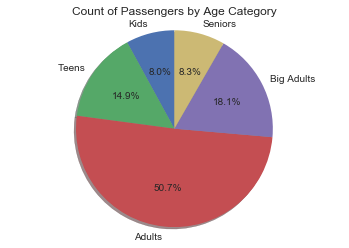

In [22]:
sizes = list(ct.loc[cats, 'All'])
print(sizes)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Count of Passengers by Age Category')
plt.show()

#### Survivants by Age Category

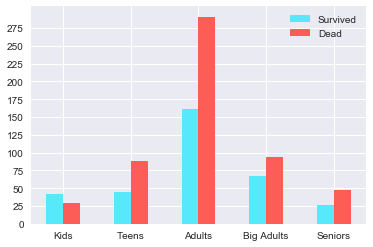

In [23]:
ind = np.arange(5)
width = 0.25

survivants_values = list(ct.loc[cats, 1])
deads_values = list(ct.loc[cats, 0])


plt.bar(ind,  survivants_values, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, deads_values, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, ('Kids', 'Teens', 'Adults', 'Big Adults','Seniors'))
plt.yticks(np.arange(0, 300, 25))
plt.legend(loc='upper right')
plt.show()

### The "Passenger Class" Feature:
<span style="color:red; font-weight: bold">#Data Visualisation</span>

In [24]:
ct = pd.crosstab(train_df.Pclass, train_df.Survived, margins=True)
cats = list(ct.index.values)
cats.remove('All') # Remove the 'All' row which contains the total (the Margin that we added in crosstab)
cats.sort()
print(cats)


[1, 2, 3]


[216, 184, 491]


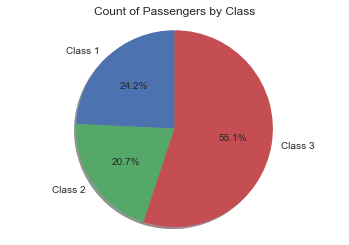

In [25]:
sizes = list(ct.loc[cats, 'All'])
print(sizes)
labels = ['Class 1', 'Class 2', 'Class 3']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Count of Passengers by Class')
plt.show()

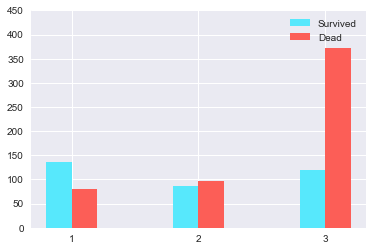

In [26]:

survivants_values = list(ct.loc[cats, 1])
deads_values = list(ct.loc[cats, 0])

ind = np.arange(3)
width = 0.2
plt.bar(ind, survivants_values, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, deads_values, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, ('1', '2', '3') )
plt.yticks(np.arange(0, 500, 50))
plt.legend(loc='upper right')
plt.show()

### The "Embarked" Feature: 
<span style="color:red; font-weight: bold">#Data_Visualisation</span>

In [27]:
ct = pd.crosstab(train_df.Embarked, train_df.Survived, margins=True)
cats = list(ct.index.values)
cats.remove('All') # Remove the 'All' row which contains the total (the Margin that we added in crosstab)
print(cats)


['C', 'Q', 'S']


[168, 77, 646]


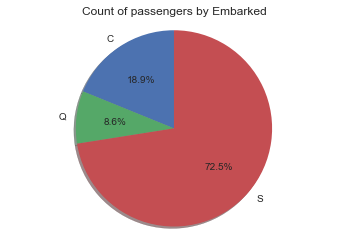

In [28]:
sizes = list(ct.loc[cats, 'All'])
labels=cats
print(sizes)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Count of passengers by Embarked')
plt.show()

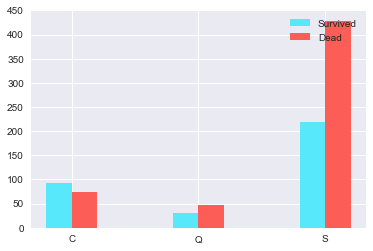

In [29]:

survivants_values = list(ct.loc[cats, 1])
deads_values = list(ct.loc[cats, 0])

ind = np.arange(len(cats))
width = 0.2
plt.bar(ind, survivants_values, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, deads_values, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, (cats) )
plt.yticks(np.arange(0, 500, 50))
plt.legend(loc='upper right')
plt.show()

### The "Number of Relatives" Feature:
<span style="color:red; font-weight: bold">#Feature Engineering #Data_Visualisation</span>

- We use the columns ***'SibSp'*** (number of Siblings and Spouses) and ***'Parch'*** (number of Parents and Children) to engineer a new Feature called ***'NbrRelatives'*** which is the total number of relatives for the passenger on board.

In [30]:
def construct_nbr_relatives_col(sibsp_col, parch_col):
    return sibsp_col+parch_col

In [31]:
train_df['NbrRelatives'] = construct_nbr_relatives_col(train_df['SibSp'], train_df['Parch'])
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCat,NbrRelatives
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q,2,0
12,13,0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,S,1,0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",0,21.000000,2,2,W./C. 6608,34.3750,S,1,4


In [32]:
ct = pd.crosstab(train_df.NbrRelatives, train_df.Survived)

cats = list(ct.index.values)
print(cats)

survivants_vals = ct.loc[:, 1]
deads_vals = ct.loc[:, 0]

[0, 1, 2, 3, 4, 5, 6, 7, 10]


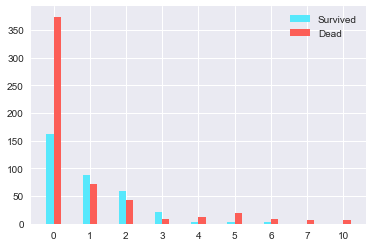

In [33]:
ind = np.arange(len(cats))
width = 0.2
plt.bar(ind, survivants_vals, width, label='Survived' , color=COLOR_SURVIVED)
plt.bar(ind+width, deads_vals, width, label='Dead', color=COLOR_DEAD)
plt.xticks(ind+width/2, cats)
plt.legend(loc='upper right')
plt.show()

- Drop the **'SibSp'** and **'Parch'** Columns

In [34]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### The "IsAlone" Feature ?
<span style="color:red; font-weight: bold">#Feature Engineering #Data_Visualisation</span>

- We continue by identifying the passengers who are alone (who don't have relatives on board) using a new Feature **'IsAlone'**

#### Create the IsAlone Feature:

In [35]:
def construct_is_alone_col(nbr_relatives_col):
    return nbr_relatives_col.apply(lambda x: True if x == 0 else False)

In [36]:
train_df['IsAlone'] = construct_is_alone_col(train_df.NbrRelatives)
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,29.699118,2661,15.2458,C,2,2,False
310,311,1,1,"Hays, Miss. Margaret Bechstein",0,24.000000,11767,83.1583,C,2,0,True
453,454,1,1,"Goldenberg, Mr. Samuel L",1,49.000000,17453,89.1042,C,3,1,False


#### Visualization of Survival counts by IsAlone  :

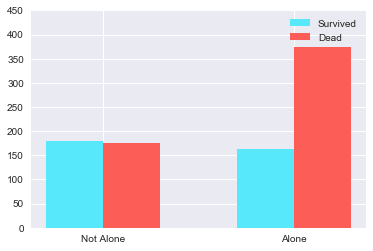

In [37]:
ct = pd.crosstab(train_df.IsAlone, train_df.Survived)
cats = ['Alone' if x is True else 'Not Alone' for x in list(ct.index.values)]

survivants_values = list(ct.loc[:, 1])
deads_values = list(ct.loc[:, 0])

ind = np.arange(len(cats))
width = 0.3
plt.bar(ind, survivants_values, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, deads_values, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, (cats) )
plt.yticks(np.arange(0, 500, 50))
plt.legend(loc='upper right')
plt.show()

### The "Title" Feature: 

<span style="color:red; font-weight: bold">#Feature Engineering #Data_Visualization</span>

#### Create and Explore the Title Feature: 

- In the **'Name'** Column, we notice that there is a pattern. We can extract the **Title** of each passenger into its own feature. It can be useful because it gives us some information about the socio-economic class of the passenger

In [38]:
train_df['Title'] = train_df['Name'].str.extract(r'([A-Za-z]*)\.', expand=False)
print('Counts of different Titles:')
train_df['Title'].value_counts()

Counts of different Titles:


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Mme           1
Ms            1
Countess      1
Don           1
Sir           1
Lady          1
Name: Title, dtype: int64

- We can see that many Titles don't occur very much, so we can collect them under a new Title called ***'Rare'***

In [39]:
rare_titles = ['Jonkheer', 'Don', 'Sir', 'Countess', 'Capt', 'Jonkheer', 'Dona', 'Major', 'Dr', 'Rev', 'Col', 'Lady']
train_df['Title'].replace(rare_titles, 'Rare', inplace=True)
train_df[train_df['Title'] == 'Rare'].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
660,661,1,1,"Frauenthal, Dr. Henry William",1,50.0,PC 17611,133.65,S,4,2,False,Rare
317,318,0,2,"Moraweck, Dr. Ernest",1,54.0,29011,14.00,S,4,0,True,Rare
745,746,0,1,"Crosby, Capt. Edward Gifford",1,70.0,WE/P 5735,71.00,S,4,2,False,Rare


- Gather the Female titles which aren't useful for prediction into one Title (Miss)

In [40]:
train_df['Title'].replace(['Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss', inplace=True)

- We make it into a function to use it later with Test Data:

In [41]:
def construct_title_col(name_col):
    title_col = name_col.str.extract(r'([A-Za-z]*)\.', expand=False)
    rare_titles = ['Jonkheer', 'Don', 'Sir', 'Countess', 'Capt', 'Jonkheer', 'Dona', 'Major', 'Dr', 'Rev', 'Col', 'Lady']
    title_col.replace(rare_titles, 'Rare', inplace=True)
    title_col.replace(['Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss', inplace=True)
    return title_col

In [42]:
# Check if working by droping the Column and creating it again using the function
train_df.drop('Title', axis=1, inplace=True)
train_df['Title'] = construct_title_col(train_df['Name'])
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
482,483,0,3,"Rouse, Mr. Richard Henry",1,50.0,A/5 3594,8.05,S,4,0,True,Mr
213,214,0,2,"Givard, Mr. Hans Kristensen",1,30.0,250646,13.00,S,2,0,True,Mr
665,666,0,2,"Hickman, Mr. Lewis",1,32.0,S.O.C. 14879,73.50,S,2,2,False,Mr
89,90,0,3,"Celotti, Mr. Francesco",1,24.0,343275,8.05,S,2,0,True,Mr
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",1,18.0,236171,13.00,S,1,0,True,Mr


#### Replace Age of Master Passengers who had missing values :

- We notice below, that all passengers with title **'Master'** have age less than 12 (except for those that we edited earlier  which have the Age == 29~ which is the mean of all ages)

( I just show 5 random rows here for better visualization )

In [43]:
train_df[train_df['Title']=='Master'].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
803,804,1,3,"Thomas, Master. Assad Alexander",1,0.42,2625,8.5167,C,0,1,False,Master
164,165,0,3,"Panula, Master. Eino Viljami",1,1.00,3101295,39.6875,S,0,5,False,Master
278,279,0,3,"Rice, Master. Eric",1,7.00,382652,29.1250,Q,0,5,False,Master
63,64,0,3,"Skoog, Master. Harald",1,4.00,347088,27.9000,S,0,5,False,Master
16,17,0,3,"Rice, Master. Eugene",1,2.00,382652,29.1250,Q,0,5,False,Master


- We will then replace the previously missing age values for the 'Master' passengers with the mean of (only) the 'Master' passengers ages, which is a better estimation than the previous value of mean of all passengers ages

In [44]:
train_df.loc[ (train_df['Title']=='Master') & (train_df['PassengerId'].isin(missing_age_rows['PassengerId'])) , 'Age'] = np.NaN
mean_age_masters = train_df.loc[ (train_df['Title']=='Master') ].Age.mean()
print('Mean of Master passengers\'s ages :' , mean_age_masters)
print('Number of Master passengers who will be affected by the change: ', train_df[train_df['Title'] == 'Master']['Age'].isnull().sum())

Mean of Master passengers's ages : 4.574166666666667
Number of Master passengers who will be affected by the change:  4


In [45]:
train_df.loc[ (train_df['Title']=='Master') & (train_df['PassengerId'].isin(missing_age_rows['PassengerId'])) , 'Age'] = mean_age_masters
train_df.loc[ (train_df['Title']=='Master') & (train_df['PassengerId'].isin(missing_age_rows['PassengerId']))]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
65,66,1,3,"Moubarek, Master. Gerios",1,4.574167,2661,15.2458,C,2,2,False,Master
159,160,0,3,"Sage, Master. Thomas Henry",1,4.574167,CA. 2343,69.5500,S,2,10,False,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",1,4.574167,4133,25.4667,S,2,4,False,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,4.574167,2661,15.2458,C,2,2,False,Master


In [46]:
# Check
train_df[train_df['Title'] == 'Master']['Age'].max()

12.0

#### Visualization of Survival Counts by Title:

In [47]:
ct = pd.crosstab(train_df.Title, train_df.Survived)
cats = list(ct.index.values)
print(cats)
#ct

['Master', 'Miss', 'Mr', 'Rare']


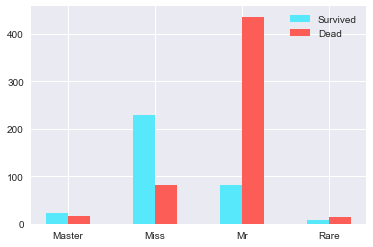

In [48]:

survivants_vals = ct.loc[cats, 1]
deads_vals = ct.loc[cats, 0]

ind = np.arange(len(cats))
width = 0.25
plt.bar(ind, survivants_vals, width, label='Survived', color=COLOR_SURVIVED)
plt.bar(ind+width, deads_vals, width, label='Dead', color=COLOR_DEAD)

plt.xticks(ind+width/2, cats)
plt.legend(loc='upper right')
plt.show()

- Drop the **'Name'** Column

In [49]:
train_df.drop('Name', axis=1, inplace=True)

## Preprocess the Test Data:

- Now that we got a good overview of the Training Data, we proceed to the final preprocessings on both Training and Test Data

In [50]:
test_df = pd.read_csv(f'{INPUT_DIR}/test.csv')
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S
243,1135,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
393,1285,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
145,1037,3,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S


In [51]:
print(f'Checking for Missing values in Test Dataset (out of {len(test_df)}): ')
test_df.isnull().sum()

Checking for Missing values in Test Dataset (out of 418): 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- The missing values in Cabin are not a problem, we will drop the column anyway
- Regarding missing values in'Age' Column, we will impute them as we imputed them in Train Dataset:
    - Replace all NaN values of passengers with Title Master with Mean of Ages of passengers that have 'Master' Title
    - The Others replace them with the mean of all passengers

### Construct Title, NbrRelatives, IsAlone Columns for Test Dataset:

In [52]:
test_df['Title'] = construct_title_col(test_df['Name'])
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.55,D22,S,Mr
359,1251,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.55,NaN,S,Miss
291,1183,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.95,NaN,Q,Miss


In [53]:
test_df['NbrRelatives'] = construct_nbr_relatives_col(test_df['SibSp'], test_df['Parch'])
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NbrRelatives
92,984,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27.0,1,2,F.C. 12750,52.0000,B71,S,Miss,3
252,1144,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C,Mr,1
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S,Miss,1


In [54]:
test_df['IsAlone'] = construct_is_alone_col(test_df['NbrRelatives'])
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NbrRelatives,IsAlone
147,1039,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.05,NaN,S,Mr,0,True
304,1196,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.75,NaN,Q,Miss,0,True
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.05,NaN,S,Mr,2,False


### Handle Missing Values in 'Age' Column of Test Dataset:

In [55]:
print('Nbr of Missing Age Values for passengers with Master Title', test_df[test_df['Title'] == 'Master'].Age.isnull().sum())

Nbr of Missing Age Values for passengers with Master Title 4


In [56]:
mean_ages_masters = test_df[test_df['Title'] == 'Master'].Age.mean()
print(mean_ages_masters)
test_df.loc[ (test_df['Title'] == 'Master') & (test_df['Age'].isnull()), 'Age'] = mean_ages_masters

assert not test_df[test_df['Title'] == 'Master'].Age.isnull().any()

7.406470588235294


In [57]:
print('Nbr of Missing Age Values for passengers except Master Title', test_df[test_df['Title'] != 'Master'].Age.isnull().sum())

Nbr of Missing Age Values for passengers except Master Title 82


In [58]:
mean_ages_all = test_df.Age.mean()
print(mean_ages_all)
test_df['Age'] = test_df.Age.fillna( mean_ages_all )

assert not test_df.Age.isnull().any()

30.000374649859946


### Construct AgeCat Column of Test Dataset:

In [59]:
test_df['AgeCat'] = construct_age_cat_col(test_df['Age'])
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NbrRelatives,IsAlone,AgeCat
254,1146,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S,Mr,0,True,2
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Mr,2,False,4
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C,Mr,1,False,3


### Encoding of the "Embarked" Feature:

In [60]:
def encode_embarked(embarked_col):
    return embarked_col.map({'S': 2, 'Q': 1, 'C': 0}).astype('int')
    #return pd.get_dummies(data=df, columns=['Embarked'])

In [61]:
def encode_title(title_col):
    return title_col.map({ 'Mr': 0, 'Miss': 1, 'Master': 2, 'Rare': 3 }).astype('int')

In [62]:
train_df['Embarked'] = encode_embarked(train_df['Embarked'])
test_df ['Embarked'] = encode_embarked(test_df['Embarked'])
train_df.Embarked.dtype

dtype('int64')

In [63]:
train_df['Title'] = encode_title(train_df['Title'])
test_df ['Title'] = encode_title(test_df['Title'])
train_df.Title.dtype

dtype('int64')

In [64]:
train_df.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
274,275,1,3,0,29.699118,370375,7.7500,1,2,0,True,1
879,880,1,1,0,56.000000,11767,83.1583,0,4,1,False,1
377,378,0,1,1,27.000000,113503,211.5000,0,2,2,False,0


In [65]:
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NbrRelatives,IsAlone,AgeCat
256,1148,3,"Mahon, Mr. John",male,30.000375,0,0,AQ/4 3130,7.7500,NaN,1,0,0,True,2
301,1193,2,"Malachard, Mr. Noel",male,30.000375,0,0,237735,15.0458,D,0,0,0,True,2
390,1282,1,"Payne, Mr. Vivian Ponsonby",male,23.000000,0,0,12749,93.5000,B24,2,0,0,True,2


### Encoding of the "Sex" Feature:

In [66]:
test_df.Sex = encode_sex(test_df.Sex)
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NbrRelatives,IsAlone,AgeCat
70,962,3,"Mulvihill, Miss. Bertha E",0,24.0,0,0,382653,7.7500,NaN,1,1,0,True,2
321,1213,3,"Krekorian, Mr. Neshan",1,25.0,0,0,2654,7.2292,F E57,0,0,0,True,2
300,1192,3,"Olsson, Mr. Oscar Wilhelm",1,32.0,0,0,347079,7.7750,NaN,2,0,0,True,2


In [67]:
drop_cols = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train_df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

In [68]:
print('Check columns of both datasets:')
train_df.columns, test_df.columns

Check columns of both datasets:


(Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'AgeCat',
        'NbrRelatives', 'IsAlone', 'Title'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
        'NbrRelatives', 'IsAlone', 'AgeCat'],
       dtype='object'))

In [69]:
OUTPUT = True
OUTPUT_DIR = '.' if IN_CLOUD else INPUT_DIR
if OUTPUT:
    train_df.to_csv(f'{OUTPUT_DIR}/train_clean.csv', index=False)
    test_df.to_csv(f'{OUTPUT_DIR}/test_clean.csv', index=False)
    print('Done Outputing to CSV')


Done Outputing to CSV


In [70]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeCat,NbrRelatives,IsAlone,Title
74,1,3,1,32.000000,56.4958,2,2,0,True,0
507,1,1,1,29.699118,26.5500,2,2,0,True,0
517,0,3,1,29.699118,24.1500,1,2,0,True,0
758,0,3,1,34.000000,8.0500,2,2,0,True,0
140,0,3,0,29.699118,15.2458,0,2,2,False,1


In [71]:
test_df.sample(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,NbrRelatives,IsAlone,AgeCat
48,940,1,0,60.000000,76.2917,0,1,0,True,4
388,1280,3,1,21.000000,7.7500,1,0,0,True,1
216,1108,3,0,30.000375,7.8792,1,1,0,True,2
69,961,1,0,60.000000,263.0000,2,1,5,False,4
153,1045,3,0,36.000000,12.1833,2,1,2,False,3
